In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display
import operator
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

sns.set()
% matplotlib inline

# Import training data and EDA

We begin by loading in the training data (15,120 instances). Let's check it out!

In [2]:
# Read in the training data
train = pd.read_csv('data/train.csv')

# Set print option to show all columns
pd.set_option('display.max_columns', len(train))

What does each feature look like?

In [3]:
# Display the training data
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [4]:
# Inspect the training data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

In [5]:
# Are there any missing values?

num_full = []
for column in train.columns:
    missing = len(train[train[column].isnull() == True])
    if missing != 0:
        print('Missing values in {}: {}'.format(column, missing))
    else:
        num_full.append(missing)
        
if len(num_full) == len(train.columns):
    print('No missing values.')

No missing values.


In [6]:
# Further inspect the training data
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

There are a few variables that won't help us in our analysis: 1) 'Id' is an identifier variable, 2) 'Soil_Type7' is 100% made of 0.0 values, and 3) 'Soil_Type15 is 100% made of 0.0 values.

In [7]:
# Drop Id, Soil_Type7, and Soil_Type15
train.drop(['Id', 'Soil_Type7', 'Soil_Type15'], axis=1, inplace=True)

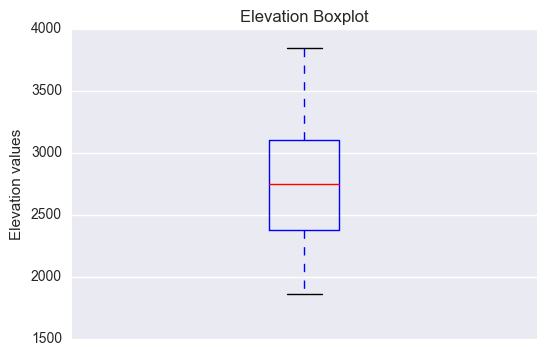

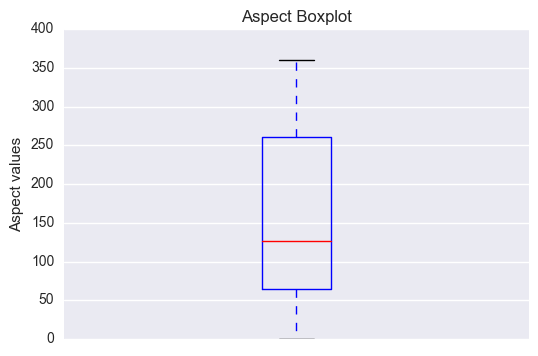

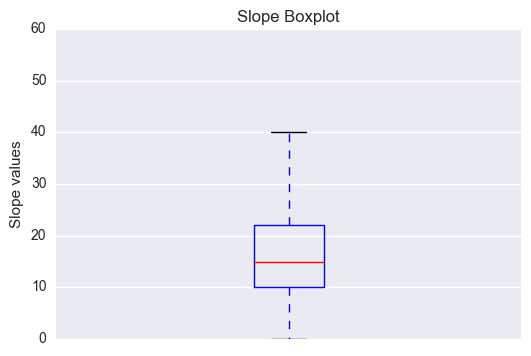

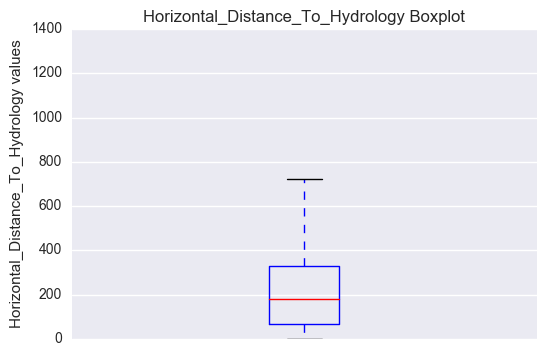

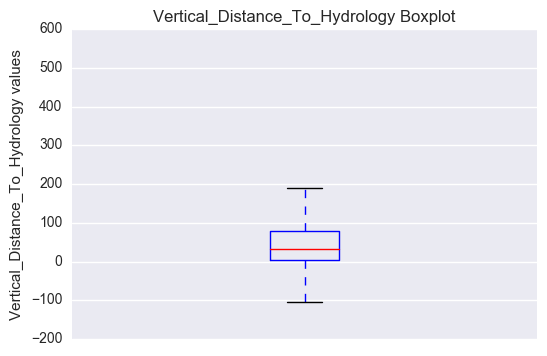

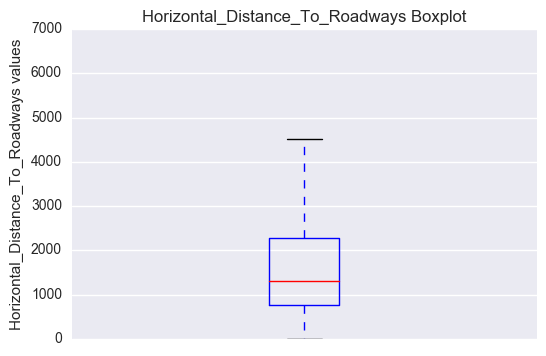

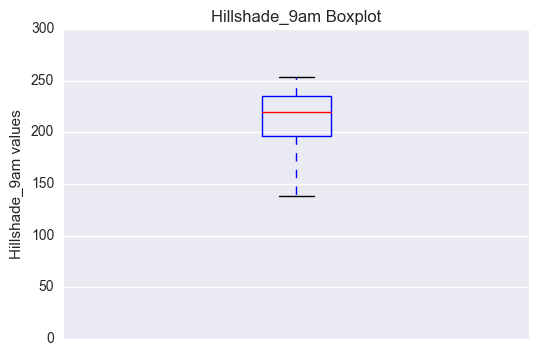

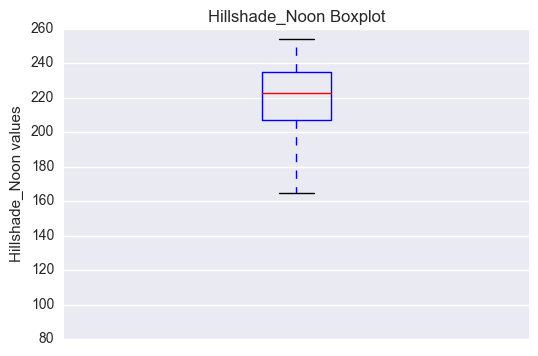

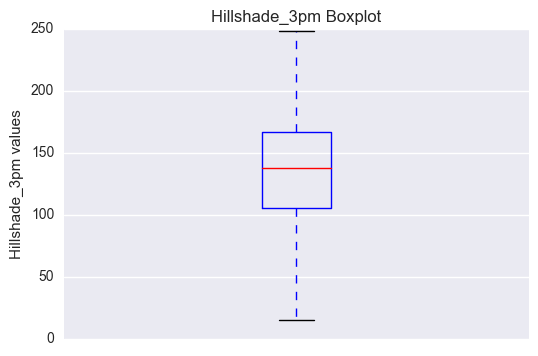

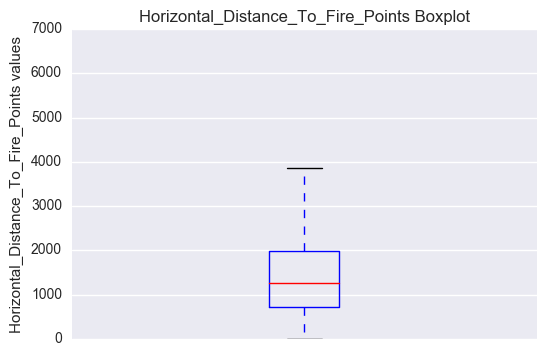

In [8]:
# Are there any outliers?

subset_train = train[['Elevation', 'Aspect', 'Slope', 
                      'Horizontal_Distance_To_Hydrology', 
                      'Vertical_Distance_To_Hydrology', 
                      'Horizontal_Distance_To_Roadways', 
                      'Hillshade_9am', 'Hillshade_Noon', 
                      'Hillshade_3pm', 
                      'Horizontal_Distance_To_Fire_Points']]

for feature in subset_train:
    plt.boxplot(subset_train[feature])
    plt.title('{} Boxplot'.format(feature))
    plt.ylabel('{} values'.format(feature))
    plt.xticks([])
    plt.show();

We see that there are no outliers, which is a good sign. What about interactions between features?

/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


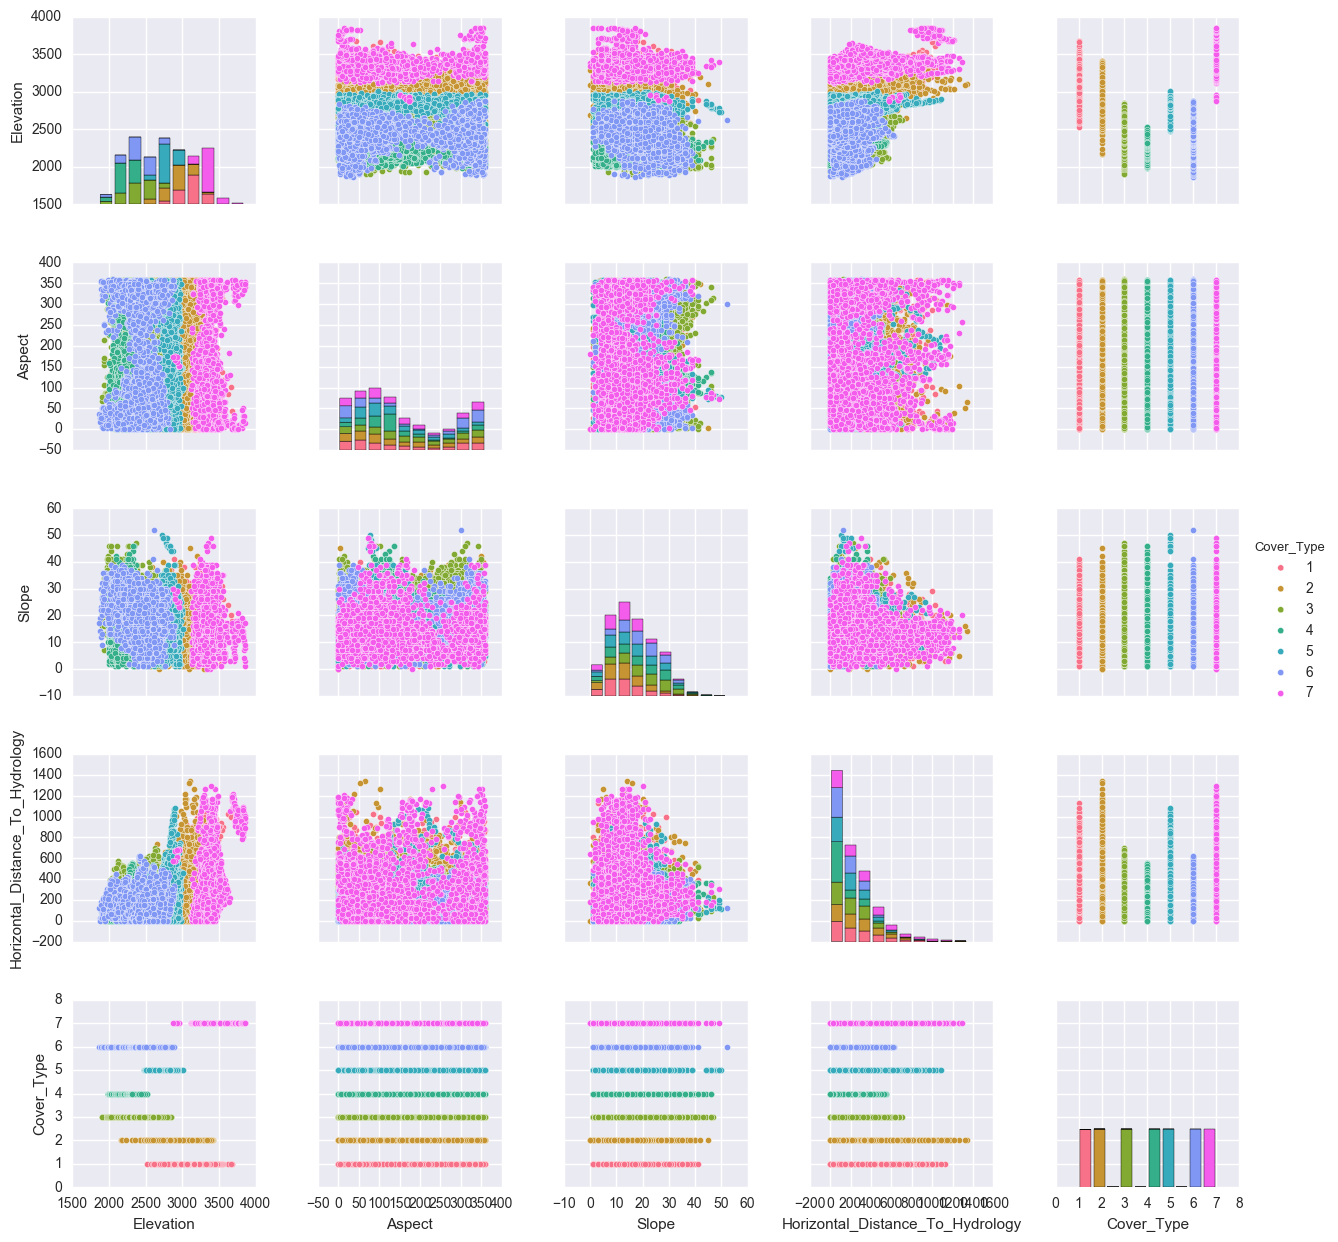

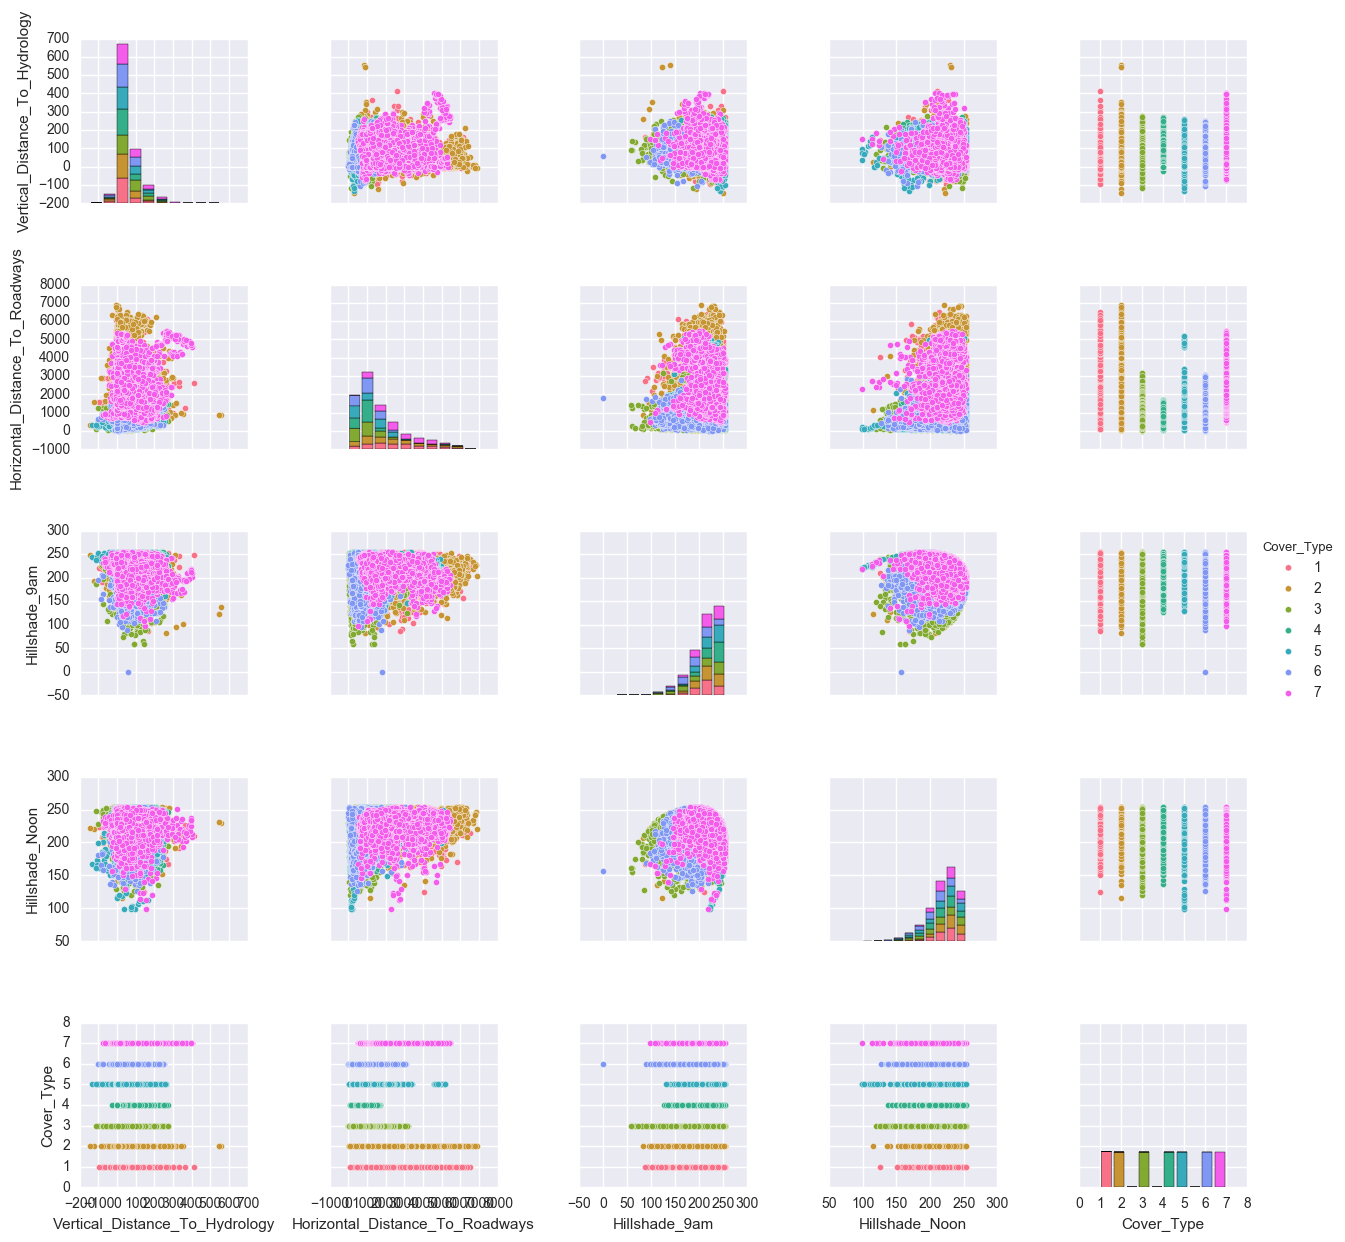

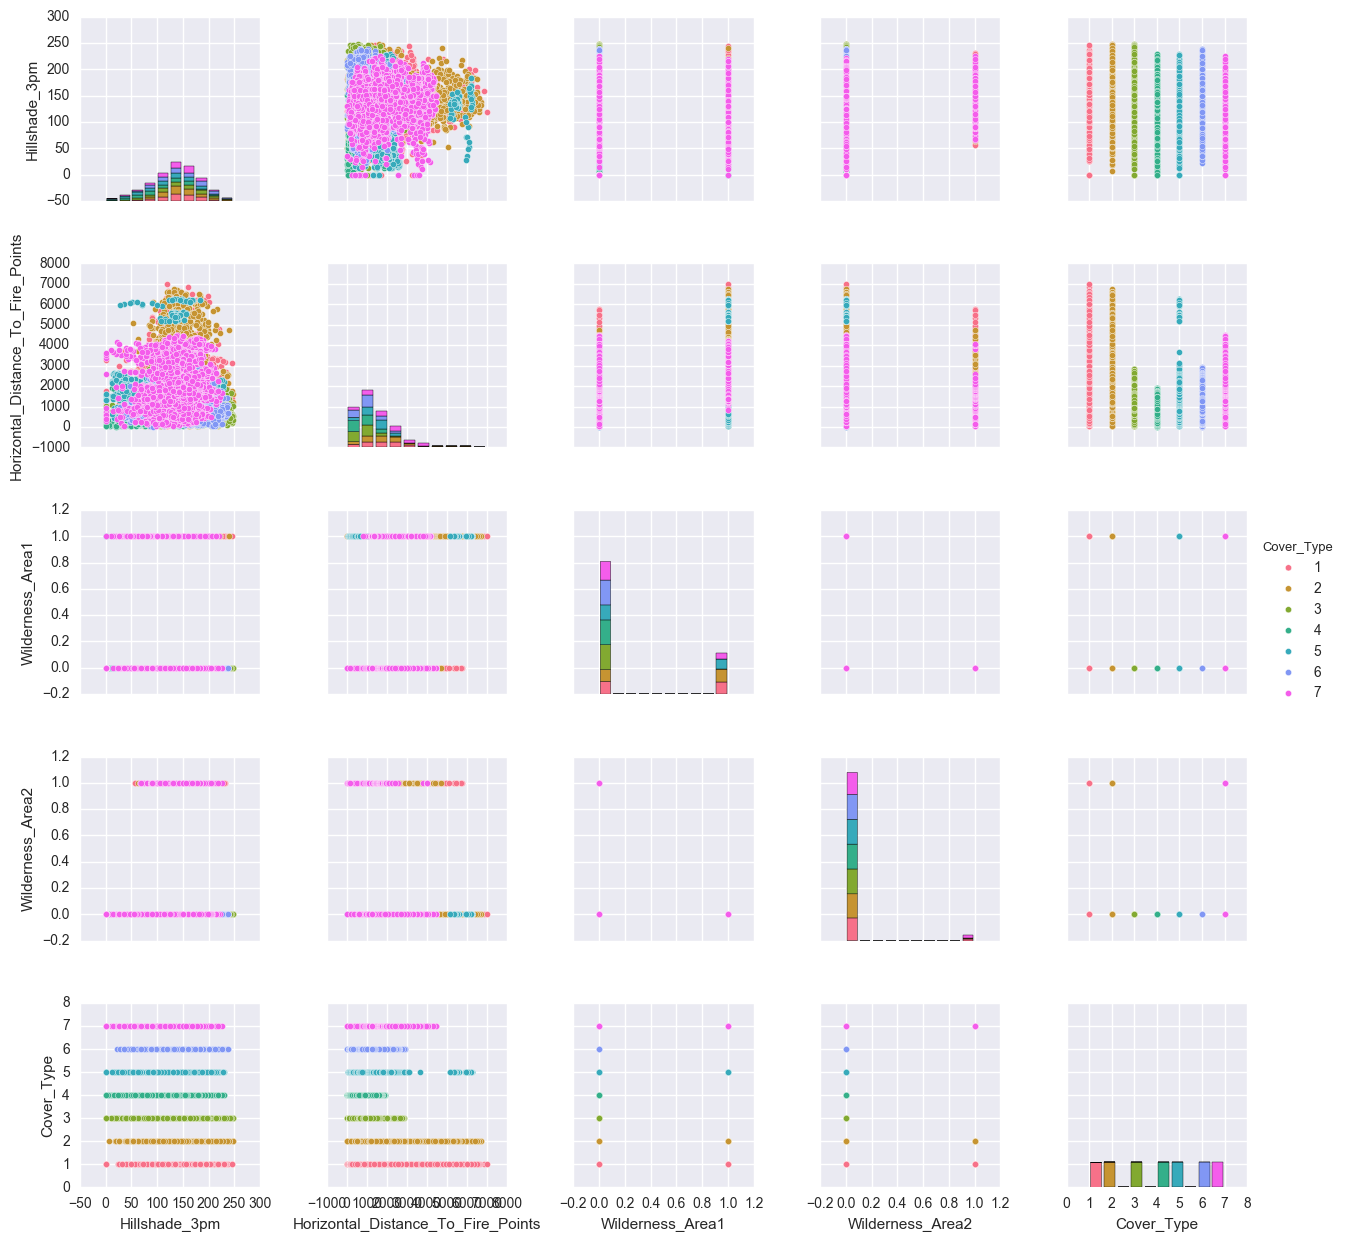

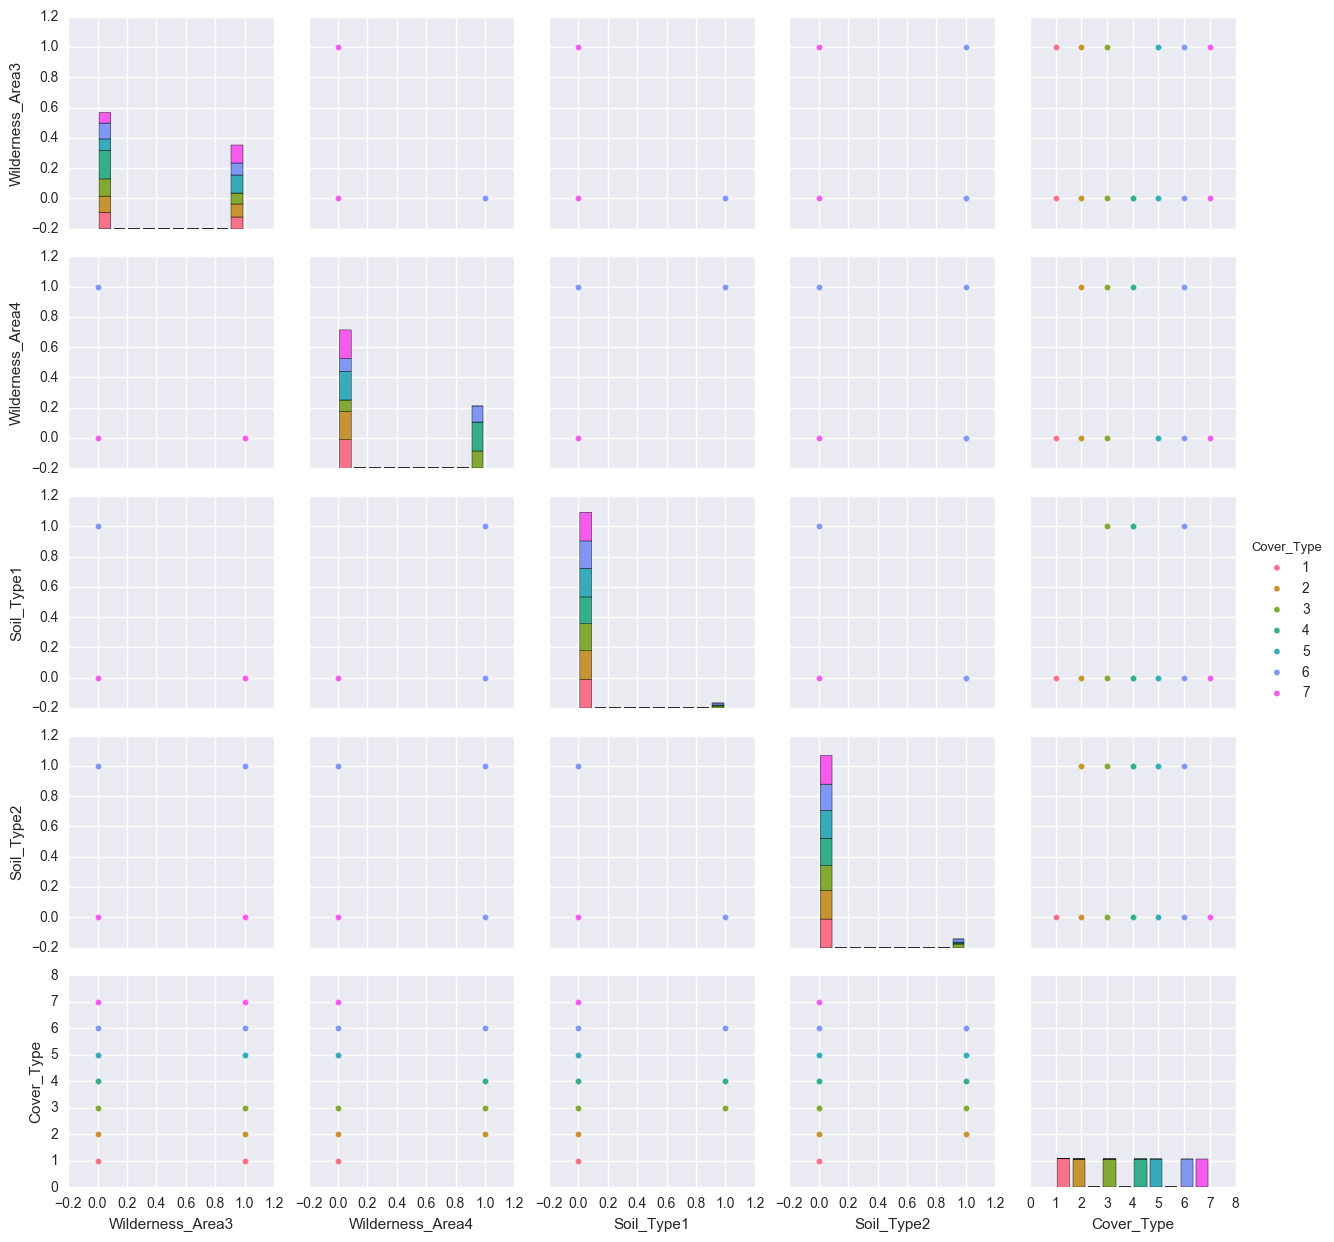

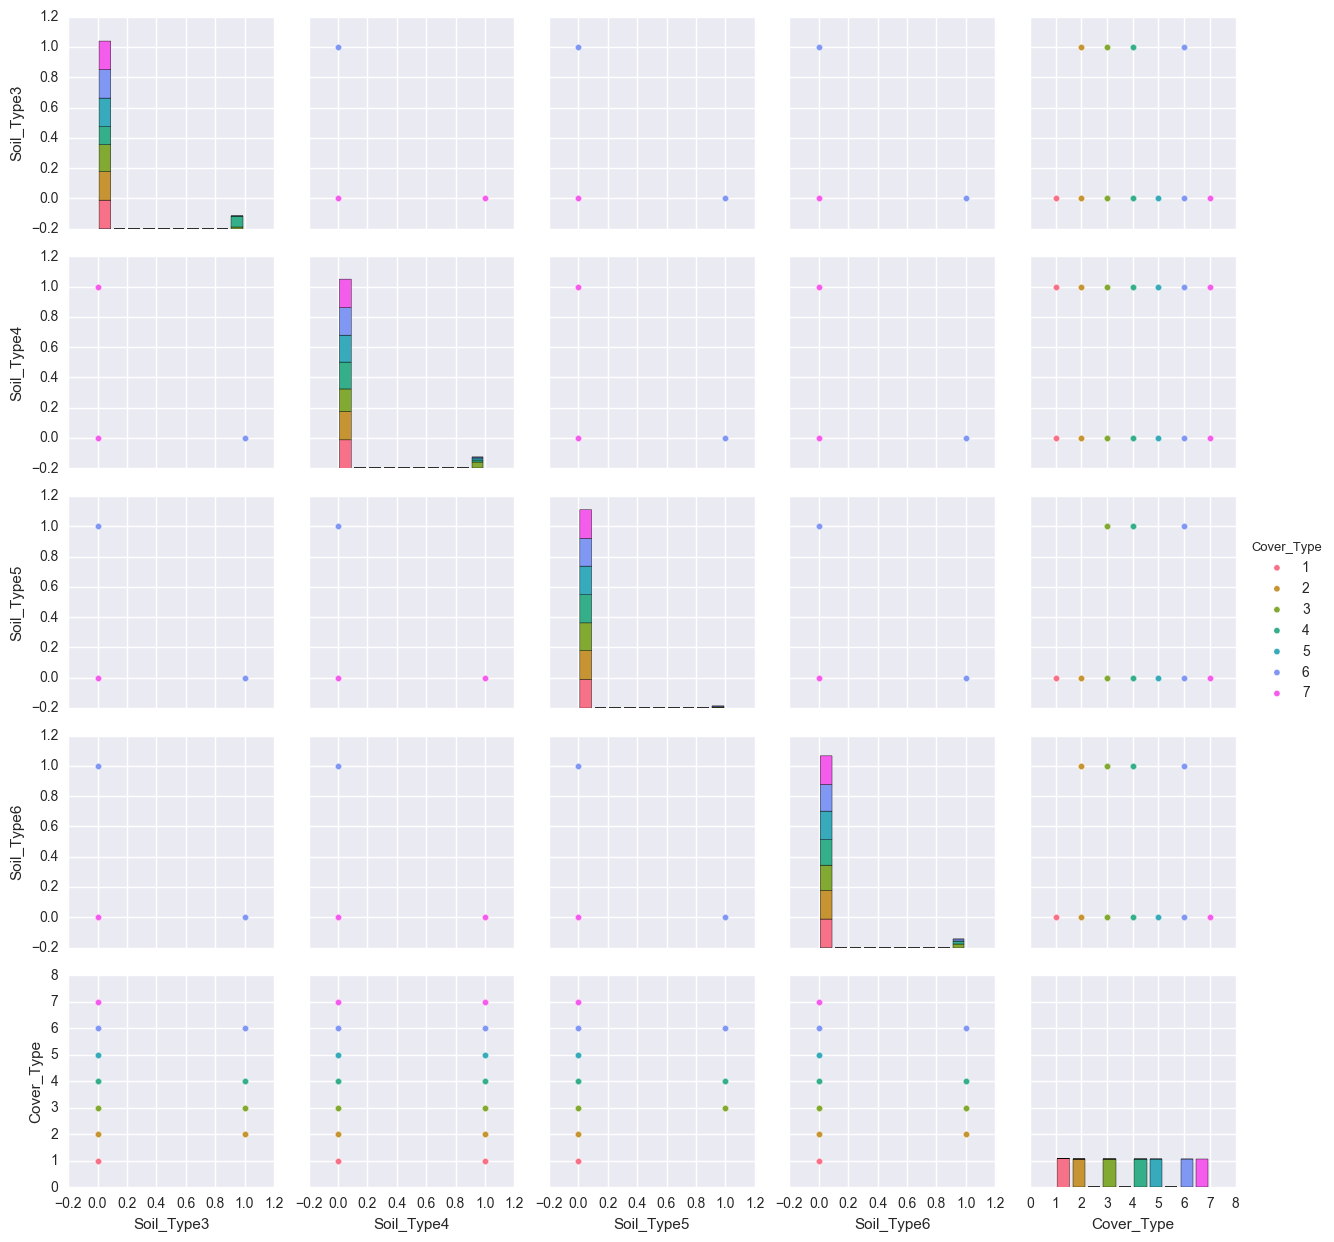

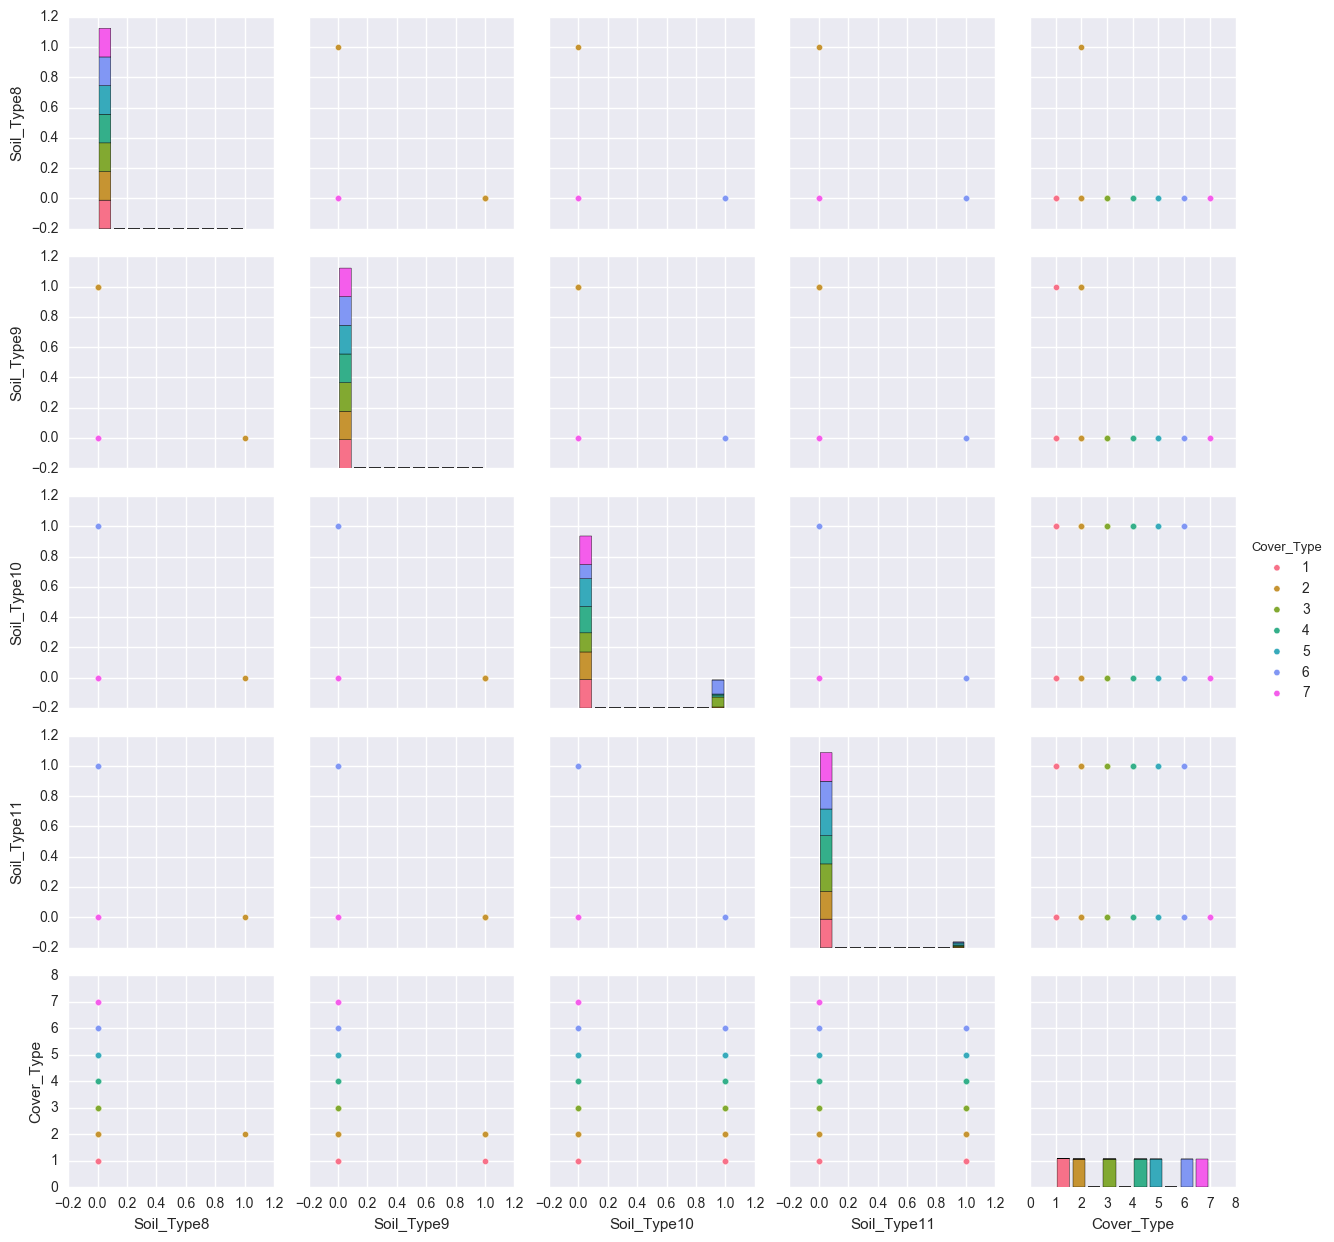

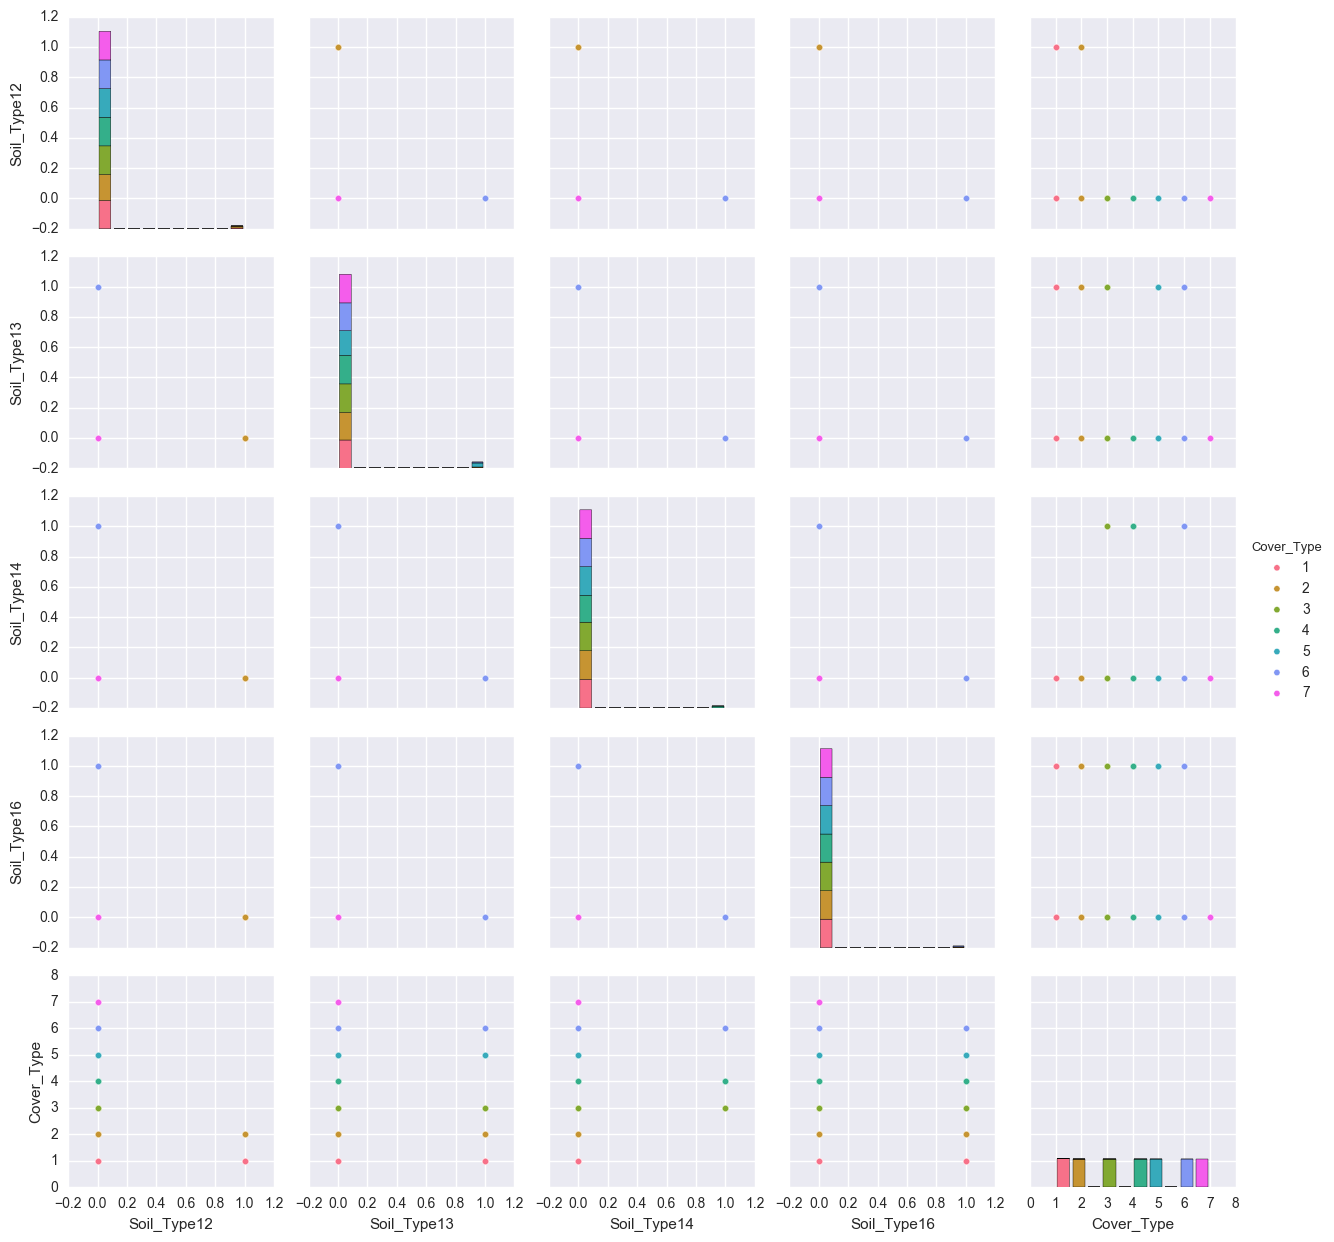

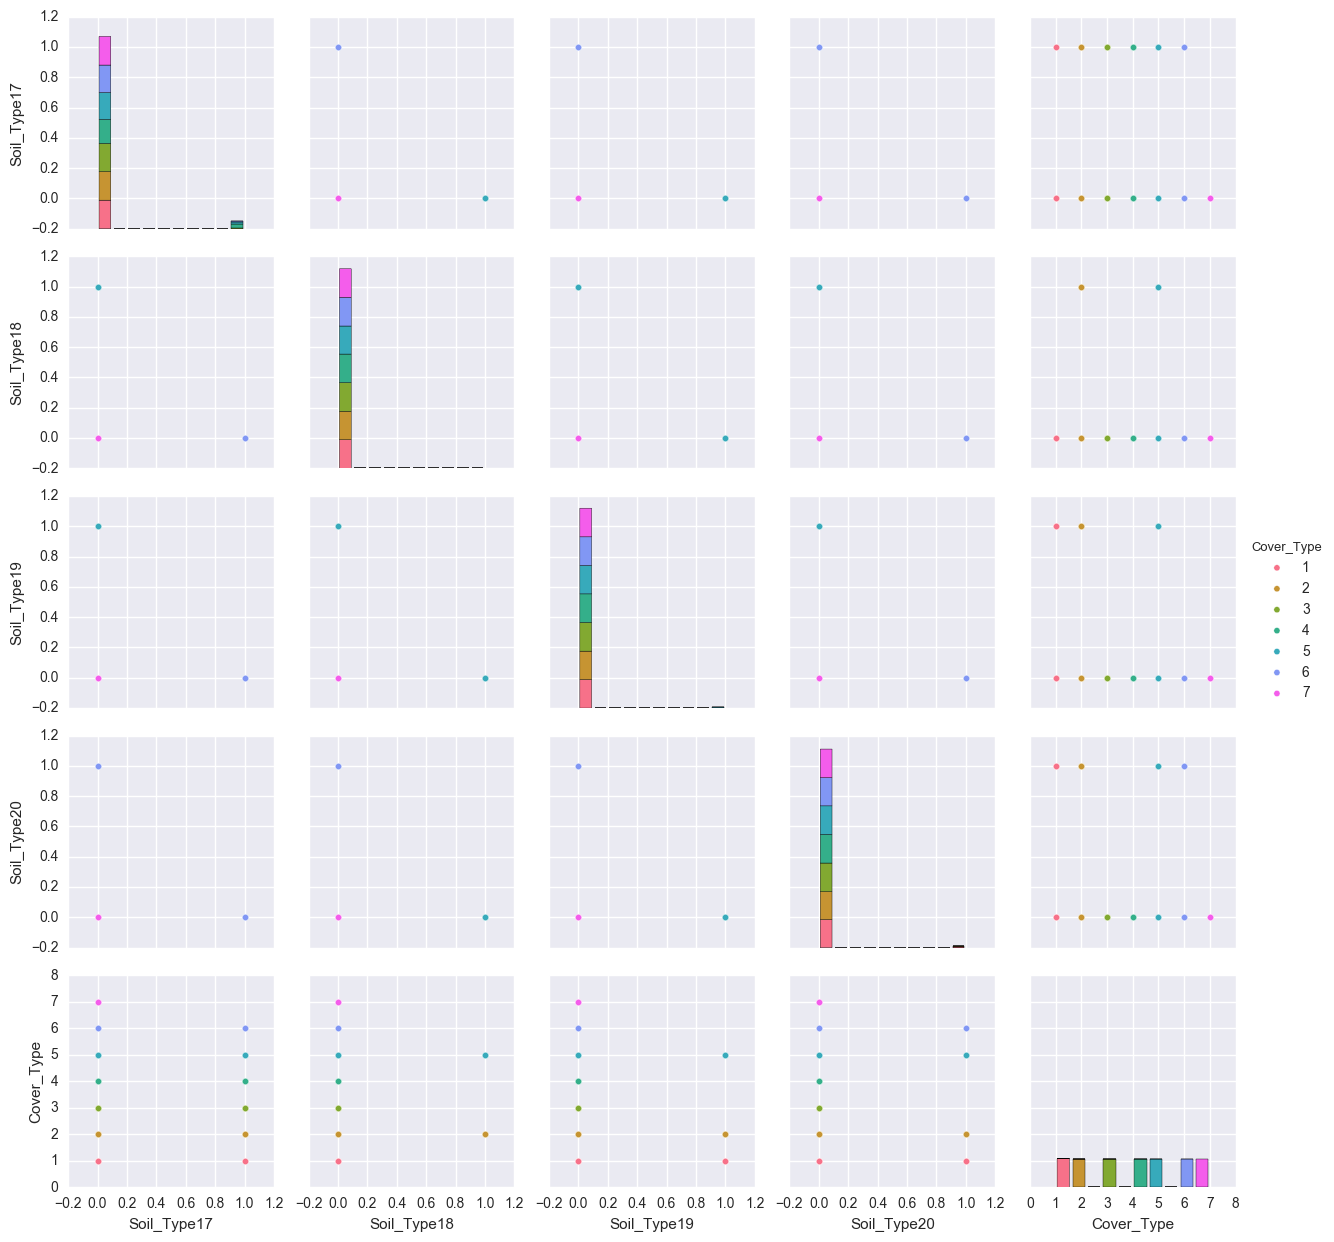

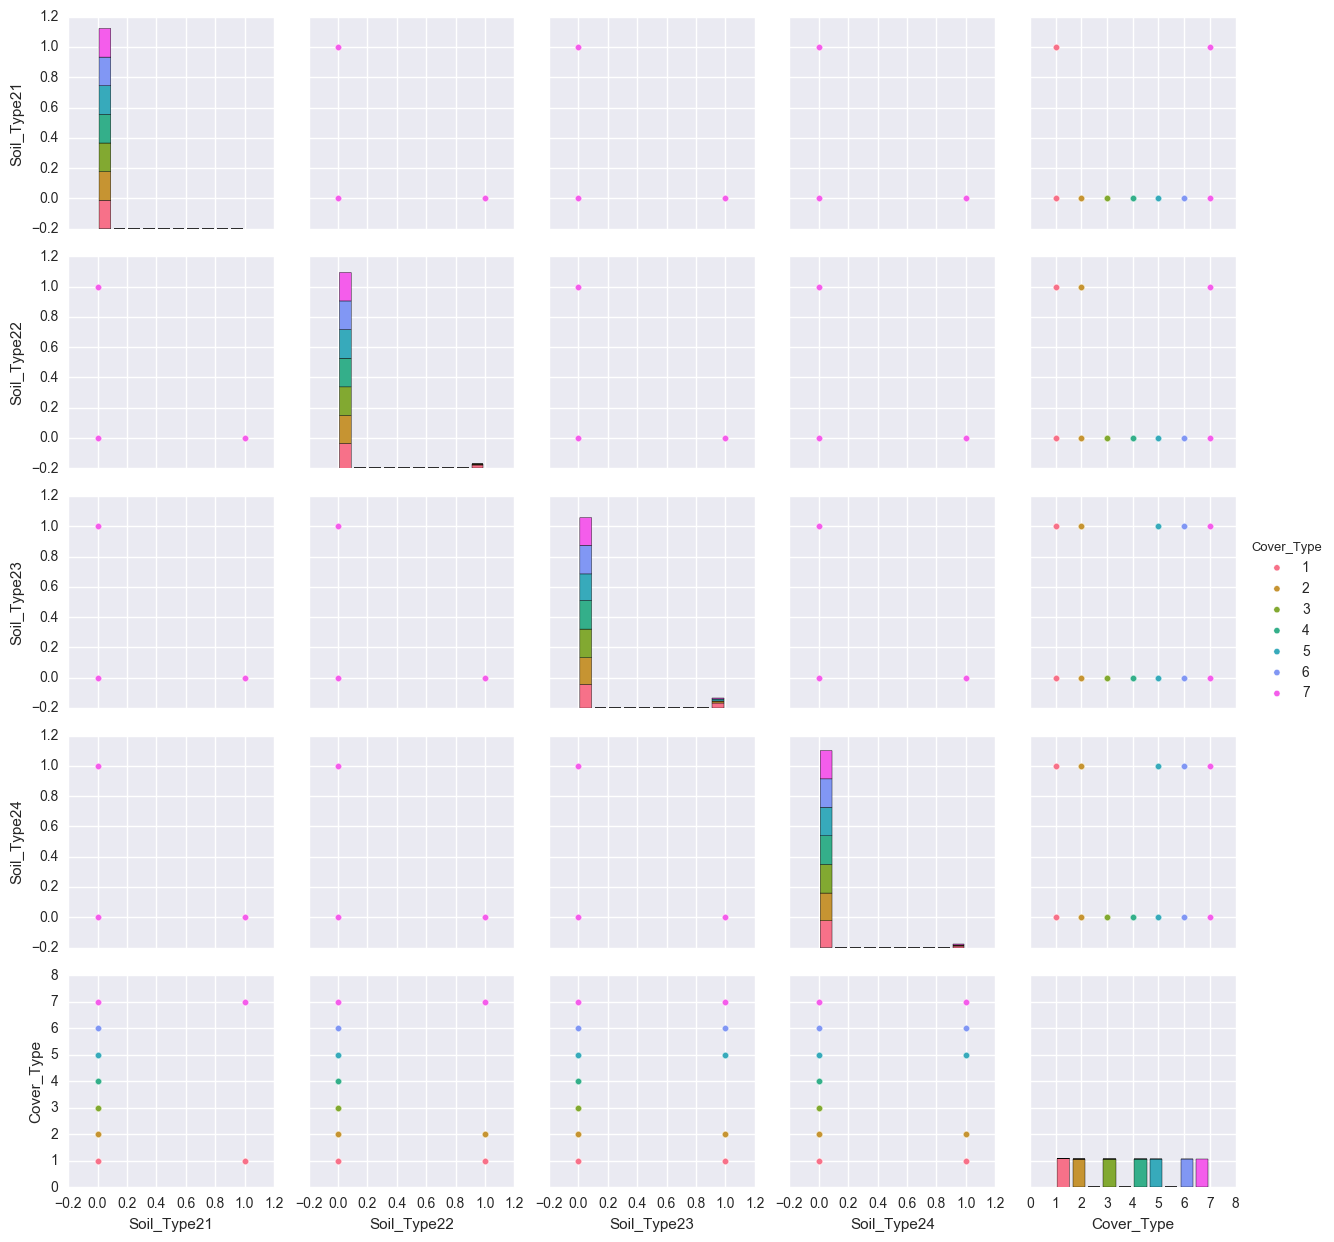

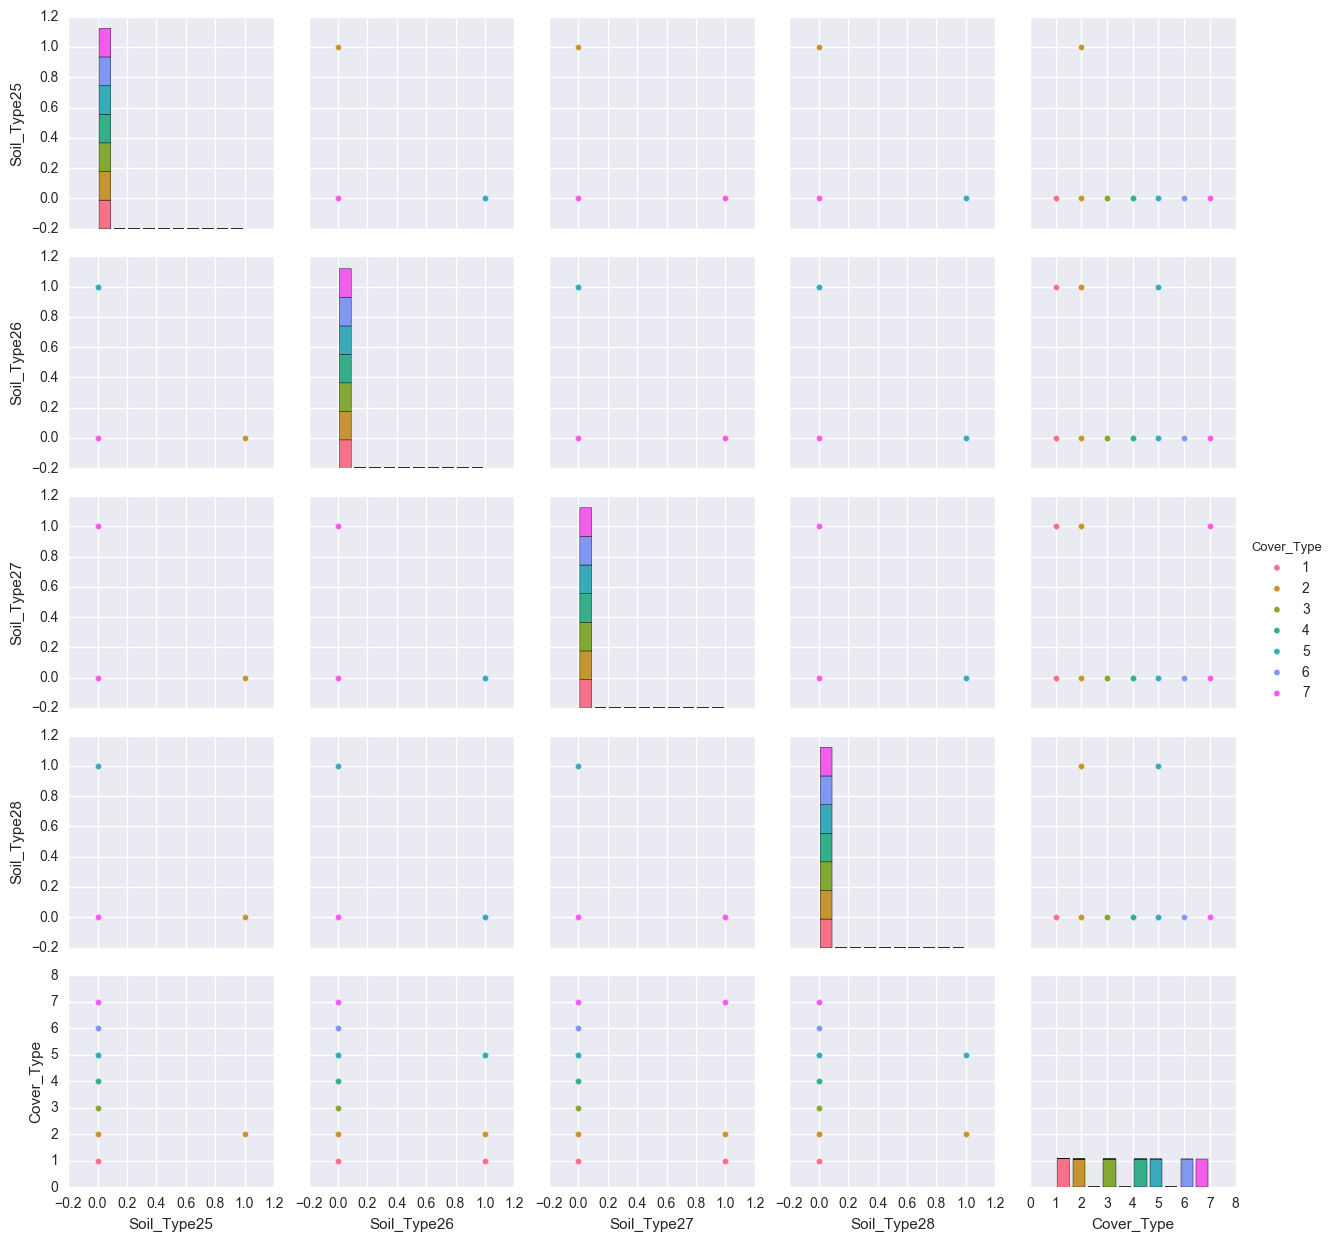

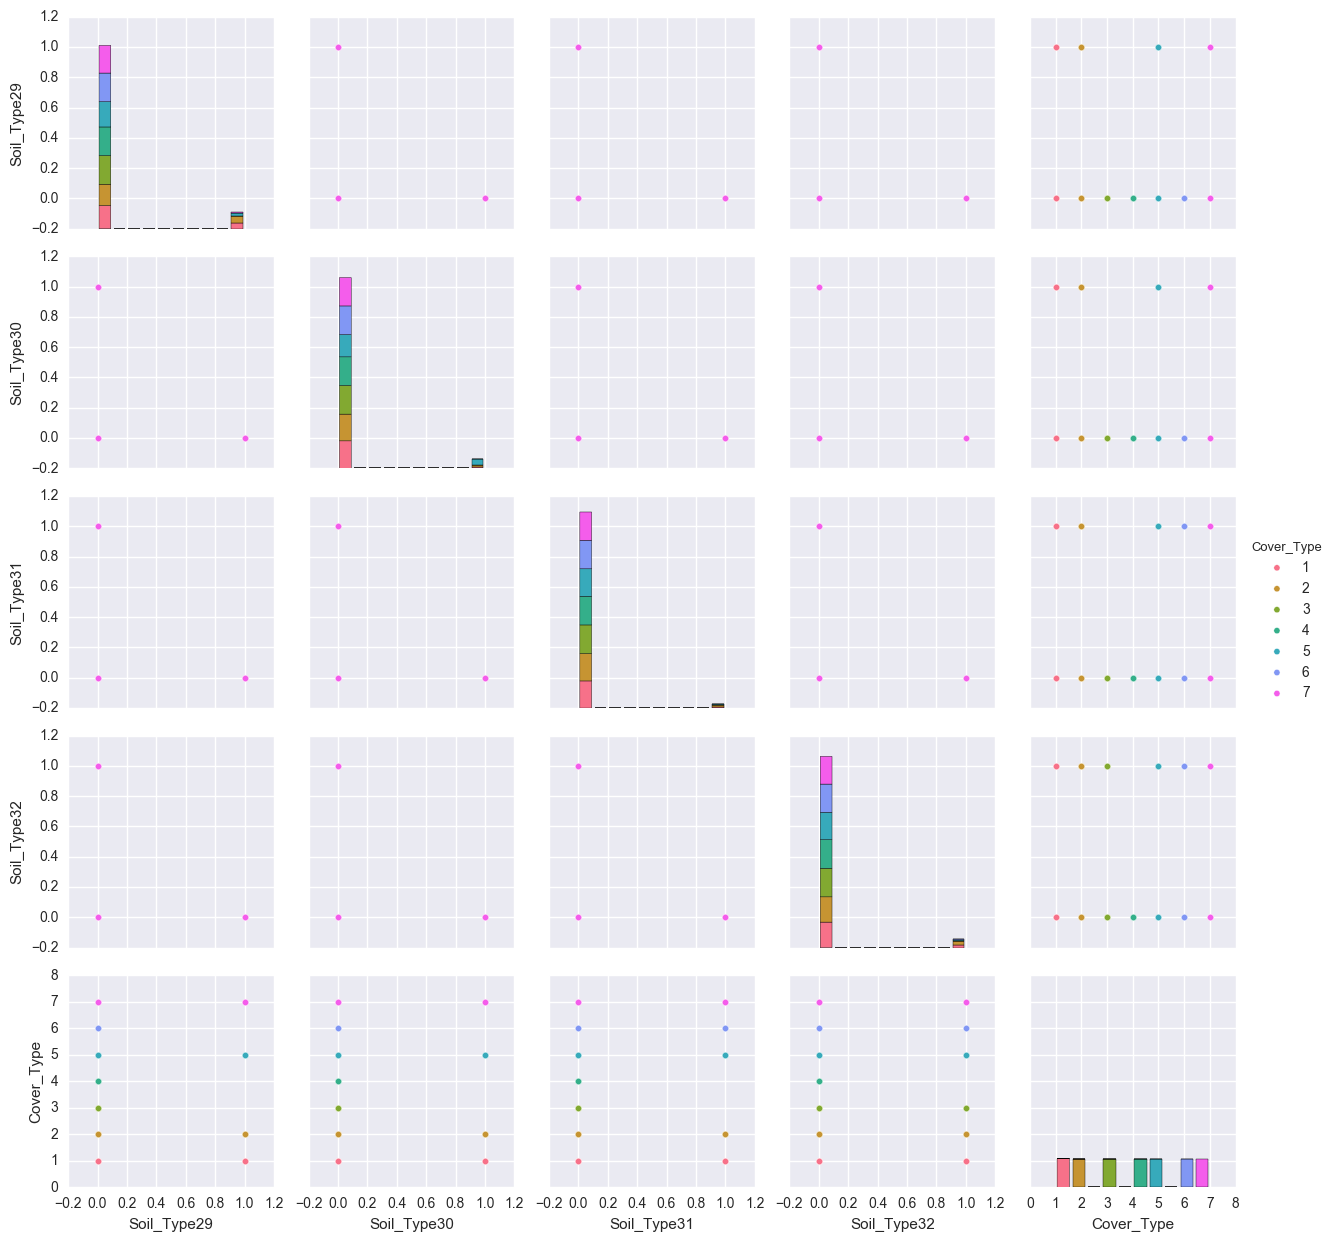

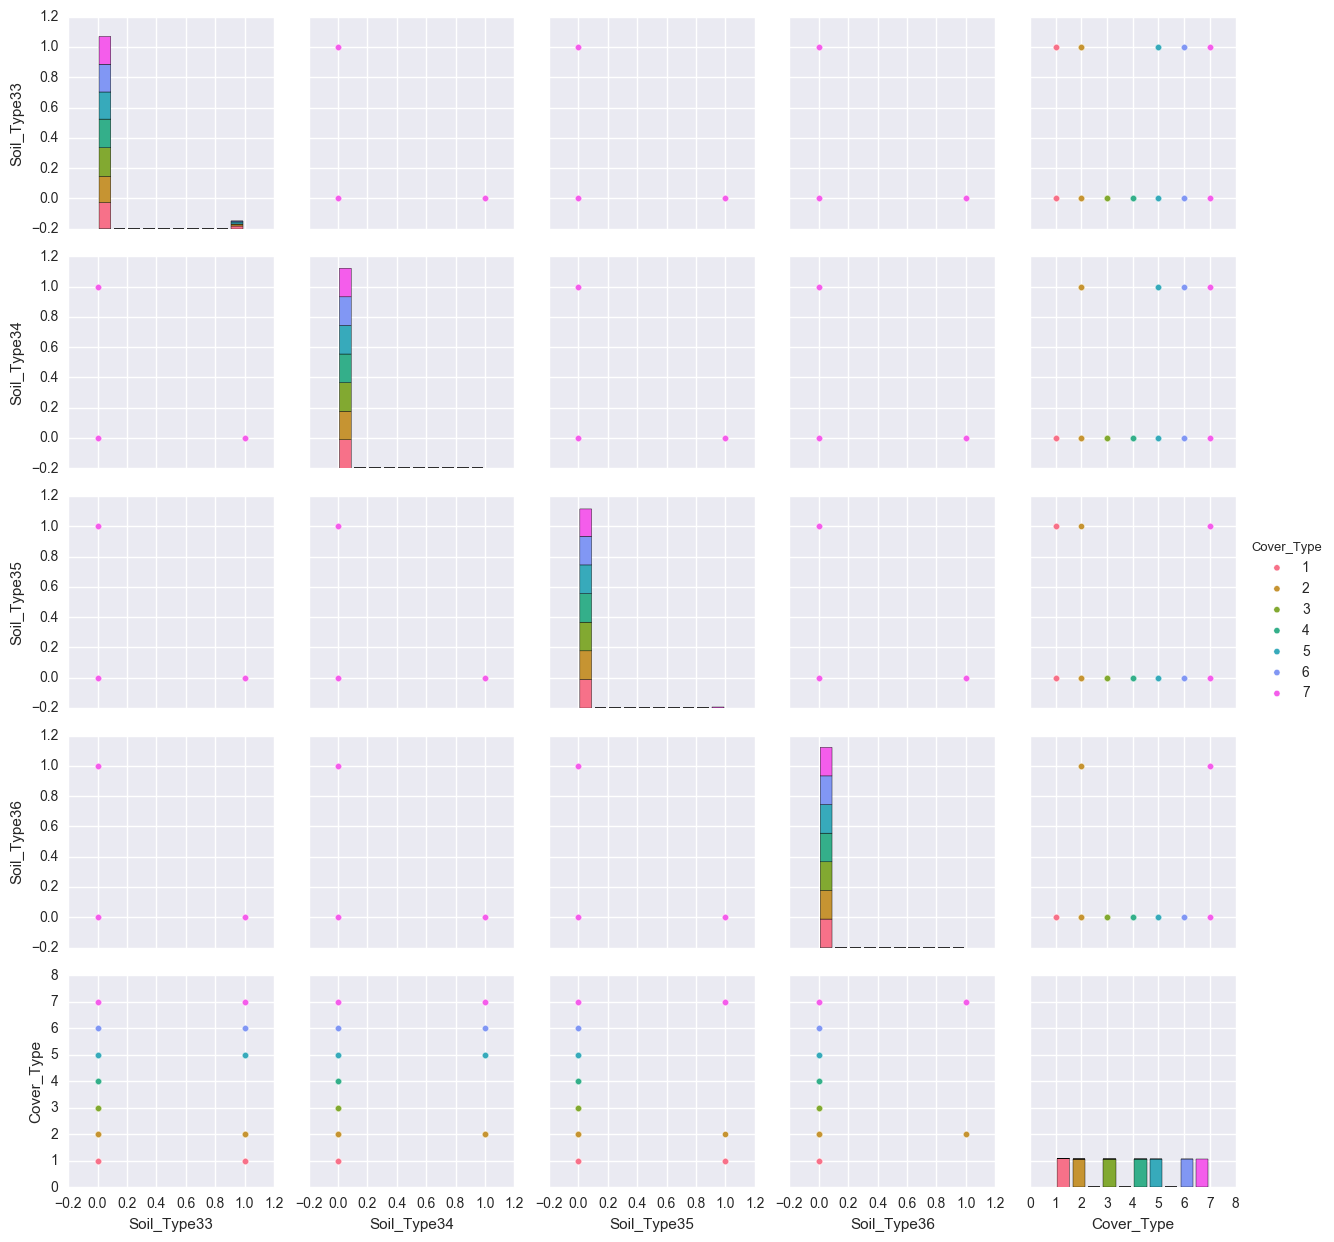

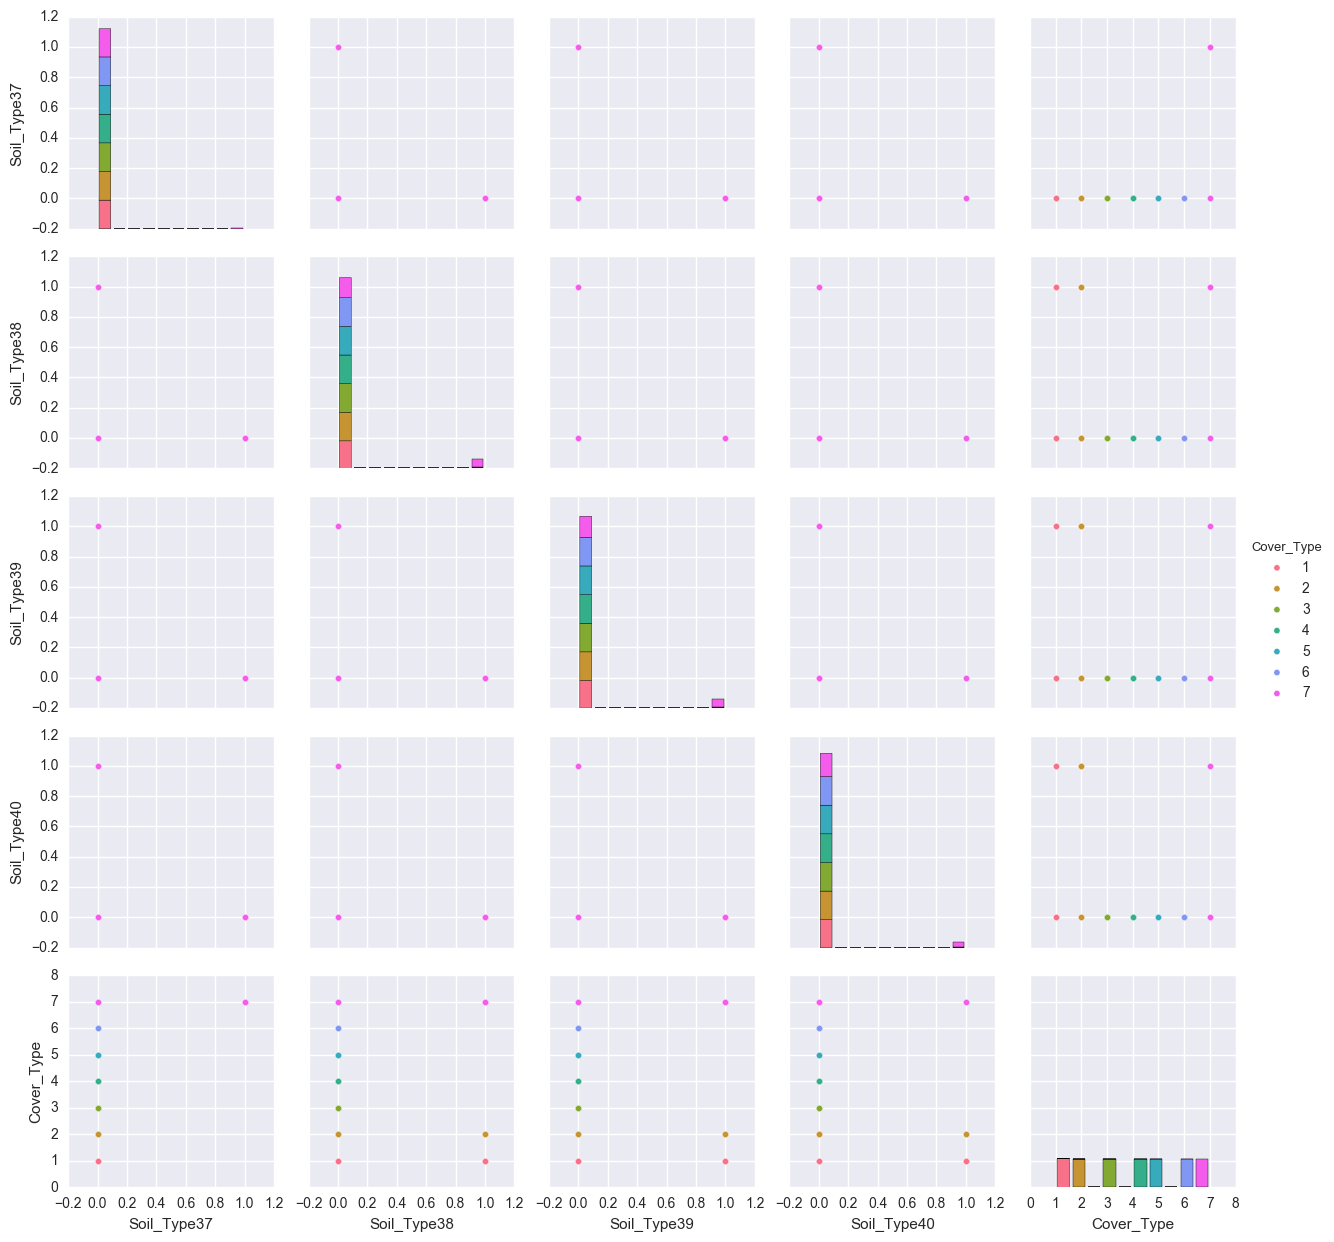

In [9]:
# Show groups of pairplots

count = 0
for column in train.columns:
    count += 1
    if count % 4 == 0:
        temp = train.iloc[:, count-4:count]
        temp['Cover_Type'] = train['Cover_Type']
        sns.pairplot(temp, hue="Cover_Type");

We see that both 'Aspect' and 'Hillshade_3pm' seem to be very evenly distributed for each class, and so these features could therefore be distracting to a model. These are dropped after closer inspection.

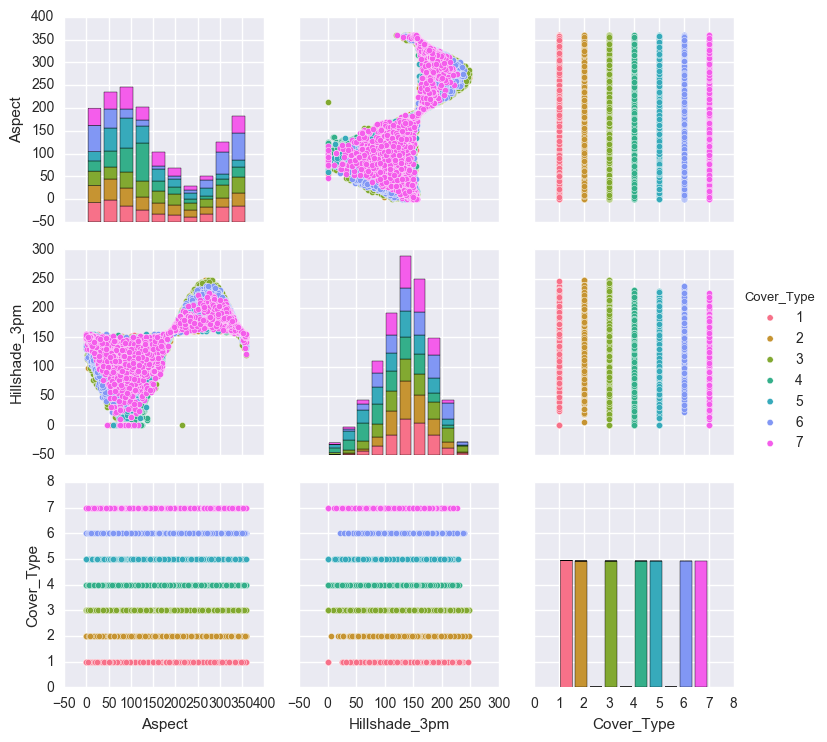

In [10]:
# Inspect Aspect and Hillshade_3pm further
sns.pairplot(train[['Aspect', 'Hillshade_3pm', 'Cover_Type']], hue='Cover_Type');

In [11]:
# Drop Aspect and Hillshade_3pm
train.drop(['Aspect', 'Hillshade_3pm'], axis=1, inplace=True)

We also notice that there are some interesting patterns among the scatterplots that could indicate high correlations and redundancy in the data. Let's inspect!

In [12]:
# Show full correlation matrix
train.corr()

,Elevation,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Elevation,1.000000,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.443563,0.330417,0.261729,0.354025,-0.783651,-0.218818,-0.147947,-0.307523,-0.125342,-0.141478,-0.187354,0.002934,-0.010571,-0.357816,-0.037906,0.017432,0.039304,-0.140619,-0.066252,-0.200663,-0.035173,0.029808,0.008548,0.032509,0.146236,0.159872,0.097647,0.010586,0.020669,0.040019,-0.001077,0.165304,0.048204,0.093191,0.172349,0.123821,0.021876,0.120157,0.040571,0.073825,0.323440,0.296405,0.306755,0.016090
Slope,-0.312640,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.239527,-0.152820,-0.065923,-0.113033,0.286985,0.099355,-0.081498,0.265541,0.087841,0.074720,-0.047868,-0.012989,-0.022220,0.255804,-0.109798,-0.115088,0.119863,-0.054085,-0.064321,-0.124375,-0.069326,-0.047742,-0.068508,-0.033935,-0.076393,-0.184528,0.017982,0.011062,-0.030700,0.012295,0.036082,-0.083108,0.118725,-0.076851,-0.147258,0.072027,-0.030590,-0.048855,-0.004570,0.003129,-0.148342,0.051900,-0.043513,0.087722
Horizontal_Distance_To_Hydrology,0.412712,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.158817,-0.009402,0.087484,0.200532,-0.239303,-0.084766,0.024234,-0.089578,-0.059398,-0.025247,0.021203,0.002819,-0.005523,-0.112852,0.026150,0.034306,0.026595,-0.111878,-0.084804,-0.159717,-0.018282,-0.033946,-0.062873,-0.025207,-0.007840,-0.087963,0.046915,-0.004615,0.027879,0.064616,0.019663,0.033854,-0.032540,0.060886,0.138275,0.062121,0.072485,-0.015446,0.077251,-0.009549,0.131444,0.066284,0.242304,-0.010515
Vertical_Distance_To_Hydrology,0.122092,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.015048,-0.117835,0.017108,0.069884,0.027321,-0.034309,0.005436,0.070414,-0.016543,0.018550,0.094701,-0.007049,-0.014610,0.018305,-0.029364,-0.033237,0.085309,-0.087445,-0.070201,-0.155574,-0.039745,-0.040898,-0.065710,-0.022197,-0.064122,-0.144317,0.017148,-0.011697,-0.016315,0.047304,0.046287,-0.056267,-0.000083,0.006247,0.020298,0.077167,0.028910,-0.021662,0.015680,-0.020717,-0.008989,0.058981,0.227110,0.075647
Horizontal_Distance_To_Roadways,0.578659,-0.277049,0.203397,0.011555,1.000000,-0.003398,0.240684,0.486386,0.367786,-0.080758,0.124378,-0.440454,-0.122634,-0.092474,-0.159434,-0.094919,-0.091419,-0.135266,0.018481,-0.019055,-0.213057,-0.079474,0.076984,0.002317,-0.071706,-0.014958,-0.080802,-0.041192,0.059096,0.046444,-0.004712,0.107962,0.132568,0.022445,-0.006635,0.025094,0.027413,-0.011532,0.265508,-0.062701,0.026668,0.031538,0.045797,0.021415,0.065310,0.030282,0.063302,0.197892,0.120953,0.144786,-0.105662
Hillshade_9am,0.097900,-0.200072,-0.033803,-0.095930,-0.003398,1.000000,-0.013712,0.078144,0.173382,-0.012096,-0.016736,-0.137192,0.028399,0.055707,0.244189,0.045107,-0.056873,0.022067,0.001942,0.006983,-0.388943,0.025773,0.045241,0.011151,-0.005909,-0.002609,-0.021711,0.025361,-0.006342,0.009027,-0.005276,-0.001826,-0.004735,-0.047164,0.010724,0.023761,-0.017156,-0.064360,0.057190,0.165877,-0.017527,0.018760,-0.050739,0.004457,0.031228,0.013886,0.013207,0.012326,0.024492,-0.017234,-0.010286
Hillshade_Noon,0.215782,-0.612613,0.080047,-0.132948,0.240684,-0.013712,1.000000,0.122098,-0.014362,0.038468,0.188611,-0.203055,-0.033156,0.089041,-0.091064,0.145950,-0.092171,0.029350,0.007859,0.003198,-0.283761,0.038560,0.051684,0.002481,0.008796,0.045869,0.082792,0.02

There are far too many correlations to inspect by hand. Let's isolate any feature pairs that show any absolute correlation above 0.75.

In [13]:
# Find all absolute correlations above 0.75
train_corr_df = train.corr()

for feature in train_corr_df:
    lower_bound = 0.75
    subset = pd.DataFrame(train_corr_df[feature])
    subset['Cover_Type'] = train_corr_df['Cover_Type']
    high_corr = pd.DataFrame(subset[((abs(subset[feature]) > lower_bound) 
                                     & (subset[feature] < 1))].dropna())
    if len(high_corr) != 0:
        display(high_corr)
        print()

,Elevation,Cover_Type
Wilderness_Area4,-0.783651,0.075774


,Wilderness_Area4,Cover_Type
Elevation,-0.783651,0.01609


The most extreme correlation of -0.78 is between 'Elevation' and 'Wilderness_Area4', which could indicate some redundancy in the data. However, it makes sense that these features could be related and the value is still not incredibly high. We might lose more than gain by dropping either of these features, so we will keep them.

Finally, let's inspect the distribution of the target class so that we don't run into problems with imbalanced data.

In [14]:
# What is the distribution of the target class?
pd.DataFrame(train['Cover_Type'].value_counts())

,Cover_Type
7,2160
6,2160
5,2160
4,2160
3,2160
2,2160
1,2160


The data looks to be of good quality now, so we can start building our ensemble model.

# Build an ensemble

We begin by splitting the training data into train and test sets so that we can set aside the testing set for error approximation after parameter tuning.

In [15]:
# Split into train and test sets
train, test = train_test_split(train, test_size=.30, 
                               random_state=42, stratify=train['Cover_Type'])

We create two functions:  
1) Find and return optimal ROC threshold, FPR, and TPR  
2) Generate 7 binary classifiers and return models, class probabilities, and ROC thresholds

In [16]:
# Define a function to find optimal ROC threshold values

def Find_Optimal_Cutoff(target, predicted):
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 
                        'tf' : pd.Series(tpr-(1-fpr), index=i), 
                        'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]
    
    return list(roc_t['threshold']), roc_t['fpr'], roc_t['tpr']

In [17]:
# Define a function that splits the original training data into train and
# validaton sets, transforms the targets from multivariate to binary, 
# builds a separate model for each binary split, trains the models on the 
# validation sets, plots ROC curves, and returns the models, class probabilities,
# and ROC thresholds for further use

def create_ensemble(data, model):

    proba_df = pd.DataFrame()
    models = {}
    optimal_threshold_dict = {}

    target = data['Cover_Type']
    train = data.drop('Cover_Type', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(train, target, 
                                                        random_state=42, 
                                                        test_size=0.30, 
                                                        stratify=target)
    
    for i in range(1,8):
        y_train_i = y_train.copy()
        y_train_i[y_train_i != i] = 0
        y_train_i[y_train_i == i] = 1

        y_test_i = y_test.copy() 
        y_test_i[y_test_i != i] = 0
        y_test_i[y_test_i == i] = 1    

        if model == 'RandomForestClassifier':
            param_grid = {'n_estimators':[70,80,90,100,110,120,130,140,150]}
            grid_search = GridSearchCV(RandomForestClassifier(), 
                                       param_grid, cv=5, scoring='roc_auc') 
            grid_search.fit(X_train, y_train_i)
            models[i] = grid_search.best_estimator_
            probab = grid_search.best_estimator_.predict_proba(X_test)[:,1]
            proba_df[i] = probab
            
        elif model == 'ExtraTreesClassifier':
            param_grid = {'n_estimators':[120,130,140,150,160,170,180,190,200,210,220,
                                          230,240,250,260,270,280,290,300]}
            grid_search = GridSearchCV(ExtraTreesClassifier(n_jobs=-1), 
                                       param_grid, cv=5, scoring='roc_auc') 
            grid_search.fit(X_train, y_train_i)
            models[i] = grid_search.best_estimator_
            probab = grid_search.best_estimator_.predict_proba(X_test)[:,1]
            proba_df[i] = probab

        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_i, probab)
        plt.title('Receiver Operating Characteristic (ROC)\nCover Type = {}'.format(i))
        plt.plot(false_positive_rate, true_positive_rate)
        optimal_threshold = Find_Optimal_Cutoff(y_test_i,probab)
        plt.plot(optimal_threshold[1].iloc[0], optimal_threshold[2].iloc[0], 'y*', ms=15)
        plt.plot([0,1],[0,1],'r--')
        plt.xlim([-0.1,1.2])
        plt.ylim([-0.1,1.2])
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.xlabel('False Positive Rate (Specificity)')
        plt.show()
        
        roc_auc = auc(false_positive_rate, true_positive_rate)
        print('AUC: {:.4f}'.format(roc_auc))
        
        optimal_threshold_dict[i] = optimal_threshold[0][0]
        print('Optimal Threshold: {:.4f}'.format(optimal_threshold[0][0]))

    observed = y_test.reset_index(drop=True)
    proba_df['Observed'] = observed    
    
    return models, proba_df, optimal_threshold_dict

We use the above two functions while specifying the ExtraTreesClassifier.

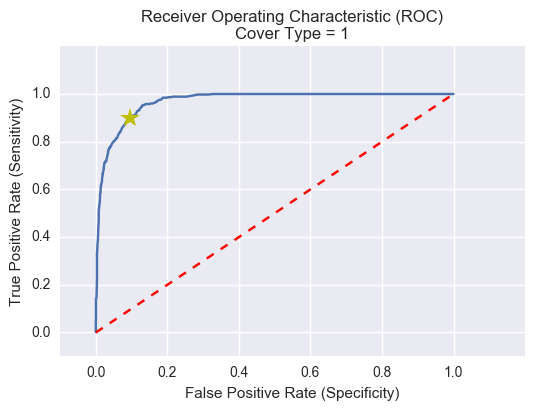

AUC: 0.9694
Optimal Threshold: 0.2542


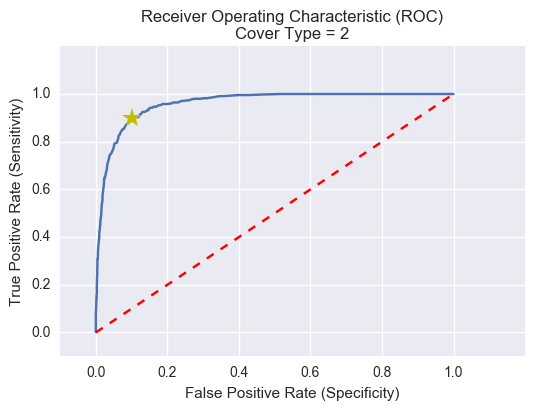

AUC: 0.9603
Optimal Threshold: 0.2500


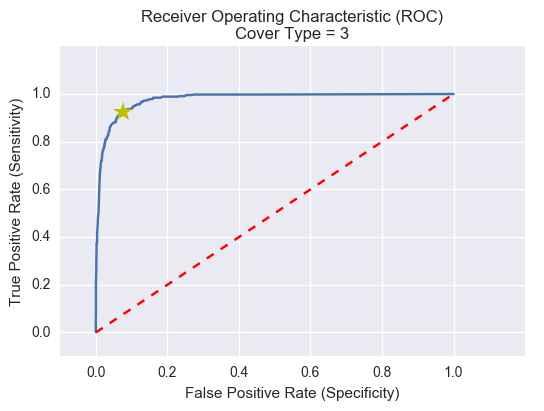

AUC: 0.9780
Optimal Threshold: 0.2679


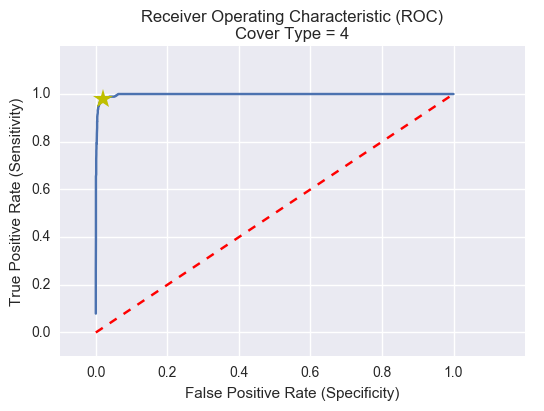

AUC: 0.9978
Optimal Threshold: 0.3412


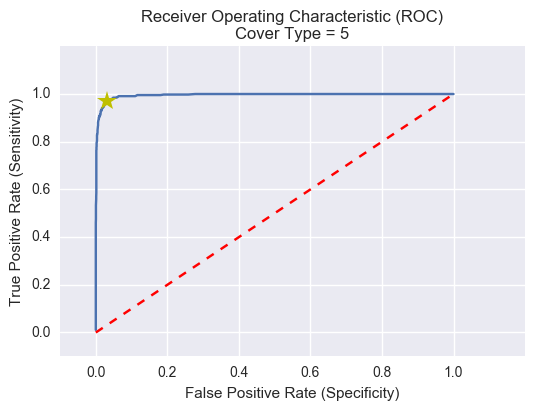

AUC: 0.9953
Optimal Threshold: 0.3227


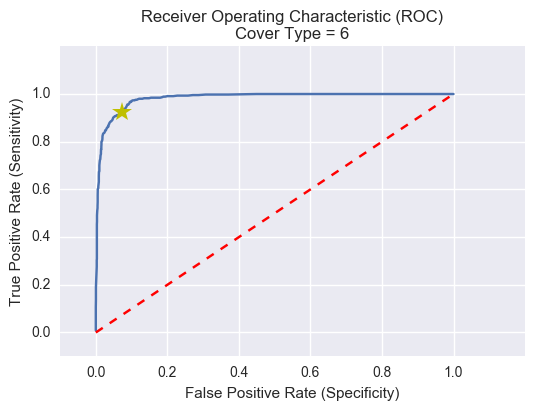

AUC: 0.9825
Optimal Threshold: 0.2778


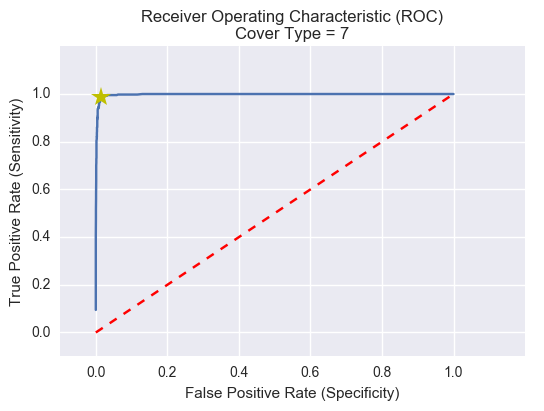

AUC: 0.9980
Optimal Threshold: 0.3565


In [18]:
# Generate models and probability distributions
# Show ROC/AUC, confusion matrices, and optimal threshold values
# Set to ignore warnings

import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)
    models_clf, proba_clf, optimal_threshold_clf = \
        create_ensemble(train, model='ExtraTreesClassifier')

What models did we generate?

In [19]:
# Show models
models_clf

{1: ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=240, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
 2: ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=240, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
 3: ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min

How do the probabilities look?

In [20]:
# Show original probabilities
proba_clf.head()

,1,2,3,4,5,6,7,Observed
0,0.070833,0.000000,0.000000,0.000000,0.000000,0.000000,0.913043,7
1,0.000000,0.000000,0.353571,0.035294,0.000000,0.566667,0.000000,6
2,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.004348,5
3,0.412500,0.383333,0.000000,0.000000,0.118182,0.016667,0.008696,2
4,0.000000,0.000000,0.610714,0.164706,0.000000,0.305556,0.000000,3


# Solve the ensemble

Now we have a set of class probabilities based on 7 binary classifiers that we have to solve.
  
We define three functions:  
1) Find and return softmax values for any set of numbers  
2) Feed the probabilities to the softmax function to obtain softmax probabilities for each instance  
3) Given the softmax probabilities, determine class predictions and evaluate accuracy

In [21]:
# Find the softmax

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [22]:
# Return softmax probabilities

def return_softmax_probas(df, test=False):
    
    try:
        df.drop('Predicted_Max', axis=1, inplace=True)
        df.drop('Predicted_Max_2', axis=1, inplace=True)
        df.drop('Optimal_Pred', axis=1, inplace=True)
    except:
        pass
    
    new_proba_list = []

    for row in df.itertuples():
        new_proba_list.append([softmax([row[1],row[2],row[3],row[4],row[5],row[6],row[7]])])

    new_proba_df = pd.DataFrame(new_proba_list)
    
    first, second, third, fourth = [], [], [], []
    fifth, sixth, seventh = [], [], []

    for row in new_proba_df.itertuples():
        first.append(row[1][0])
        second.append(row[1][1])
        third.append(row[1][2])
        fourth.append(row[1][3])
        fifth.append(row[1][4])
        sixth.append(row[1][5])
        seventh.append(row[1][6])

    new_proba_df[1] = first    
    new_proba_df[2] = second
    new_proba_df[3] = third
    new_proba_df[4] = fourth
    new_proba_df[5] = fifth
    new_proba_df[6] = sixth
    new_proba_df[7] = seventh

    new_proba_df.drop(0, axis=1, inplace=True)

    if test == False:
        new_proba_df['Observed'] = df['Observed']    
    
    return new_proba_df

In [23]:
# Solve the softmax ensemble by choosing the class with the optimal probability
# compared to the ROC threshold. Evaluate the method based on accuracy.

def predict_eval(test_type, df, evaluate=False):
        
    opt_pred_list = {}
    thresholds = {}
        
    for row in df.itertuples():
        
        # Predict based on optimal probabilities
        index_list = []
        
        # For each row, store any probabilities that are greater than the threshold
        for i in range(1,8):
            if row[i] >= optimal_threshold_clf[i]:
                index_list.append(i)

        # If there are more than one probabilities that are greater than the threshold,
        # compute the simple difference and store it. Return the class that has the greatest
        # difference
        if len(index_list) > 1:
            for index in index_list:
                thresholds[row[index] - optimal_threshold_clf[index]] = index
            index_list = [thresholds[max(list(thresholds.keys()))]]

        # Else, if there are no probabilities that are greater than the threshold,
        # Find the simple maximum of the probabilities in the row and return the class
        elif len(index_list) == 0:
            max_index, max_value = max(enumerate([row[1],row[2],row[3], row[4],row[5],row[6], 
                                                  row[7]]), key=operator.itemgetter(1)) 
                
            index_list.append(max_index + 1)

        # Else, if there is only one probability that is greater than the threshold,
        # Store its index
        elif len(index_list) == 1:
            index_list = index_list

            
        # Check to see if the decided class exceeds a certain threshold compared
        # to other classes. If it does, change the prediction and store the new index             
        
        if index_list[0] == 1:
            if row[1] - row[3] < 0.03:
                index_list = [3]
                
        elif index_list[0] == 7:
            if row[7] - row[1] < 0.05:
                index_list = [1]  
                
        elif index_list[0] == 5:
            if row[5] - row[2] < 0.03:
                index_list = [2]                  

                
        # Store the decided class in the prediction list        
        opt_pred_list[row[0]] = index_list[0]
        
    
    df['Optimal_Pred'] = opt_pred_list.values()
    if evaluate == True:
        opt_score = accuracy_score(df['Observed'], 
                                   df['Optimal_Pred'])
        print('{} Accuracy with Optimal Probabilities: {:.2f}'.format(test_type, opt_score))  
    
    return df

In [24]:
# Return new, softmax probabilities and display 

proba_clf = return_softmax_probas(proba_clf)
proba_clf.head()

,1,2,3,4,5,6,7,Observed
0,0.125320,0.116750,0.116750,0.116750,0.116750,0.116750,0.290929,7
1,0.121618,0.121618,0.173202,0.125987,0.121618,0.214338,0.121618,6
2,0.114644,0.114644,0.114644,0.114644,0.311635,0.114644,0.115144,5
3,0.185833,0.180491,0.123020,0.123020,0.138453,0.125088,0.124095,2
4,0.119358,0.119358,0.219827,0.140728,0.119358,0.162014,0.119358,3


In [25]:
# Solve the ensemble and display accuracy

proba_clf = predict_eval('Validation', proba_clf, evaluate=True)
proba_clf.head()

Validation Accuracy with Optimal Probabilities: 0.86


,1,2,3,4,5,6,7,Observed,Optimal_Pred
0,0.125320,0.116750,0.116750,0.116750,0.116750,0.116750,0.290929,7,7
1,0.121618,0.121618,0.173202,0.125987,0.121618,0.214338,0.121618,6,6
2,0.114644,0.114644,0.114644,0.114644,0.311635,0.114644,0.115144,5,5
3,0.185833,0.180491,0.123020,0.123020,0.138453,0.125088,0.124095,2,1
4,0.119358,0.119358,0.219827,0.140728,0.119358,0.162014,0.119358,3,3


In [26]:
# Show confusion matrix for predictions

cm = confusion_matrix(proba_clf['Observed'], proba_clf['Optimal_Pred'])
print('\nConfusion Matrix:\n', cm)


Confusion Matrix:
 [[355  77   1   0   7   0  13]
 [ 83 330  11   0  19   9   1]
 [  0   6 365  25   3  55   0]
 [  0   0   7 442   0   5   0]
 [  1  23   3   0 423   4   0]
 [  2   4  50  15   3 380   0]
 [ 31   0   0   0   0   0 423]]


We see that we achieve an accuracy of 86% after parameter tuning on the validation set. How do these same models and ensemble solution fare on the test set?

# Test ensemble and solution on the set aside test set

Originally, we set aside a test set so that we could further test our models. We test them below after defining a function that allows us to obtain class probabilities for this test set.

In [27]:
# Return probabilities given original models and new data

def get_probabilities(models, test_set):
    df = pd.DataFrame()

    for model in sorted(list(models.keys())):
        temp = pd.DataFrame(models[model].predict_proba(test_set))
        temp.columns = [0, model]
        df = df.append(temp[model])

    df = df.T

    return df

In [28]:
# Get probabilities using original models on the test set

test = test.reset_index(drop=True)
test_labels = test['Cover_Type']
test.drop('Cover_Type', axis=1, inplace=True)

test_proba = get_probabilities(models_clf, test)
test_proba['Observed'] = test_labels
test_proba.head()

,1,2,3,4,5,6,7,Observed
0,0.000000,0.037500,0.671429,0.070588,0.004545,0.216667,0.000000,3
1,0.000000,0.000000,0.117857,0.800000,0.000000,0.016667,0.000000,4
2,0.416667,0.116667,0.000000,0.000000,0.145455,0.000000,0.334783,7
3,0.000000,0.120833,0.010714,0.000000,0.890909,0.000000,0.000000,5
4,0.108333,0.066667,0.000000,0.000000,0.000000,0.000000,0.826087,7


In [29]:
# Return new, softmax probabilities and display 

proba_clf_test = return_softmax_probas(test_proba)
proba_clf_test.head(2)

,1,2,3,4,5,6,7,Observed
0,0.120266,0.124862,0.235365,0.129063,0.120814,0.149363,0.120266,3
1,0.119511,0.119511,0.134460,0.265977,0.119511,0.121520,0.119511,4


In [30]:
# Solve the ensemble and display accuracy

proba_clf_test = predict_eval('Test', proba_clf_test, evaluate=True)
proba_clf_test.head()

Test Accuracy with Optimal Probabilities: 0.85


,1,2,3,4,5,6,7,Observed,Optimal_Pred
0,0.120266,0.124862,0.235365,0.129063,0.120814,0.149363,0.120266,3,3
1,0.119511,0.119511,0.134460,0.265977,0.119511,0.121520,0.119511,4,4
2,0.185104,0.137128,0.122028,0.122028,0.141133,0.122028,0.170551,7,1
3,0.116597,0.131572,0.117853,0.116597,0.284187,0.116597,0.116597,5,5
4,0.131608,0.126237,0.118096,0.118096,0.118096,0.118096,0.269773,7,7


In [31]:
# Show confusion matrix for optimal predictions

cm = confusion_matrix(proba_clf_test['Observed'], proba_clf_test['Optimal_Pred'])
print('\nConfusion Matrix:\n', cm)


Confusion Matrix:
 [[492 118   1   0  12   1  24]
 [115 449  18   0  37  24   5]
 [  0   4 510  42   5  87   0]
 [  0   0  10 630   0   8   0]
 [  2  29  18   0 591   8   0]
 [  0   2  64  12   2 568   0]
 [ 32   1   0   0   0   0 615]]


We see that the tuned ensemble and solution found on the training and validation sets translate well to the held out testing data. We achieve an accuracy of 85%. Now it is time to make predictions on the Kaggle test set and submit to find scores.

# Make predictions on the Kaggle test set and write to file

In [32]:
# Write the predictions to a CSV file

def save_predictions(test_id, predictions_series, file_name, on=False):
    if on == True:
        predictions_df = pd.DataFrame({'Id':test_id, 'Cover_Type':predictions_series})
        predictions_df.set_index('Id', inplace=True)

        prediction_file = open(file_name, 'w')
        prediction_file.write(predictions_df.to_csv())
        prediction_file.close()
    
    else:
        print('Failed! Set \'on\' to True if you want to write to a file.')

In [33]:
# Import the final test set and drop features
# Display the final test set

test = pd.read_csv('data/test.csv')
test_id = test['Id']
test.drop(['Id', 'Soil_Type7', 'Soil_Type15', 'Aspect', 'Hillshade_3pm'], axis=1, inplace=True)
test.head()

,Elevation,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2680,14,0,0,2684,196,214,6645,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2683,13,0,0,2654,201,216,6675,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2713,15,0,0,2980,206,208,6344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2709,17,0,0,2950,208,201,6374,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2706,19,0,0,2920,210,195,6404,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [34]:
# Get probabilities using original models on the Kaggle test set

final_proba_clf = get_probabilities(models_clf, test)
final_proba_clf.head()

,1,2,3,4,5,6,7
0,0.545833,0.283333,0.0,0.0,0.086364,0.0,0.000000
1,0.612500,0.237500,0.0,0.0,0.068182,0.0,0.000000
2,0.500000,0.370833,0.0,0.0,0.113636,0.0,0.004348
3,0.466667,0.358333,0.0,0.0,0.131818,0.0,0.004348
4,0.462500,0.387500,0.0,0.0,0.131818,0.0,0.000000


In [35]:
# Return new, softmax probabilities and display 

final_proba_clf = return_softmax_probas(final_proba_clf, test=True)
final_proba_clf.head(2)

,1,2,3,4,5,6,7
0,0.211946,0.163013,0.122793,0.122793,0.133869,0.122793,0.122793
1,0.225454,0.154952,0.122195,0.122195,0.130817,0.122195,0.122195


In [36]:
# Solve the ensemble

final_proba_clf = predict_eval(test_type='Test', df=final_proba_clf)
final_proba_clf.head()

,1,2,3,4,5,6,7,Optimal_Pred
0,0.211946,0.163013,0.122793,0.122793,0.133869,0.122793,0.122793,1
1,0.225454,0.154952,0.122195,0.122195,0.130817,0.122195,0.122195,1
2,0.200517,0.176220,0.121620,0.121620,0.136256,0.121620,0.122149,1
3,0.195165,0.175127,0.122386,0.122386,0.139630,0.122386,0.122919,1
4,0.193611,0.179621,0.121918,0.121918,0.139096,0.121918,0.121918,1


In [37]:
# Save predictions
# Kaggle result: 0.74538

save_predictions(test_id, final_proba_clf['Optimal_Pred'], 'ensemble_extratrees_preds_final.csv', on=True)

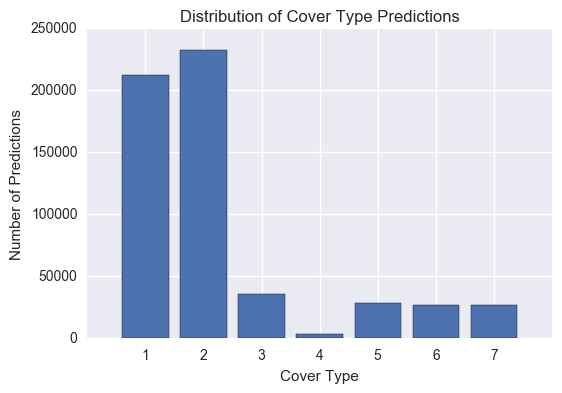

In [38]:
# What does the resulting class distribution look like?
# Plot a bar graph

plt.bar(list(final_proba_clf['Optimal_Pred'].value_counts().index), 
        final_proba_clf['Optimal_Pred'].value_counts(), align='center')
plt.xticks([1,2,3,4,5,6,7])
plt.ylabel('Number of Predictions')
plt.xlabel('Cover Type')
plt.title('Distribution of Cover Type Predictions');

Finally, we see that our classifiers don't do as well as we had hoped above. Originally, we saw 86% accuracy on the validation set and 85% accuracy on the test set for the ensemble solution method. We now obtain 74.538% accuracy through the optimum solution method. Why is it so much lower? Is there something wrong?  
  
Looking back, it is apparent that the classifiers were not able to very well classify between cover types 1 and 2 as exhibited by the confusion matrices. Moreover, we see that the Kaggle testing data is heavily weighted toward cover types 1 and 2, and so it is reasonable to see accuracy fall in the face of data imbalances that favor more difficult classes.